### imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from ml1_mnist.base import BaseEstimator
from ml1_mnist.knn import KNNClassifier
from ml1_mnist.metrics import (zero_one_loss, 
                               confusion_matrix, 
                               plot_confusion_matrix)
from ml1_mnist.model_selection import TrainTestSplitter
from ml1_mnist.utils.dataset import (load_mnist, 
                                     plot_mnist_digit)
from ml1_mnist.utils.read_write import *

### load dataset

In [2]:
X, y = load_mnist(mode='train', path='data/')
X.shape

(60000, 784)

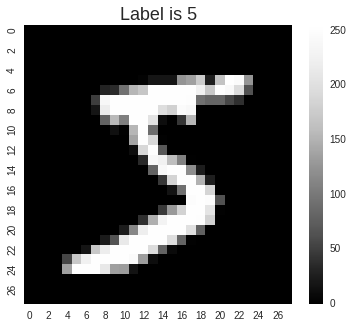

In [3]:
plot_mnist_digit(X[0], y[0]);

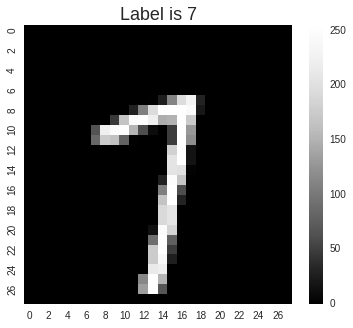

In [4]:
plot_mnist_digit(X[42], y[42]);

# k-NN

In [5]:
tts = TrainTestSplitter(shuffle=True, random_seed=1337)
for train, test in tts.k_fold_split(y[:1000], n_folds=4, stratify=True):
    print len(train), len(test), len(train) + len(test)

746 254 1000
750 250 1000
751 249 1000
753 247 1000


In [10]:
knn = KNNClassifier()
# knn.save('knn.json', json_params=dict(indent=4))
knn.fit(X, y)

KNNClassifier(algorithm='kd_tree', degree=3, gamma='auto', k=5, kd_tree_=None,
       kernel=None, leaf_size=30, p=2.0, weights='uniform')

In [8]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
C = confusion_matrix(y_true, y_pred)

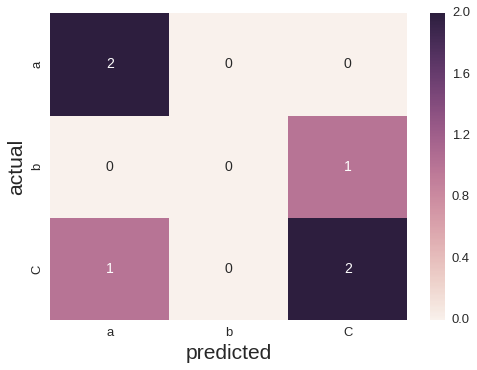

In [9]:
ax = plot_confusion_matrix(C, labels=["a", "b", "C"])